Amazon Top 50 Bestselling Books

importing all the libraries 

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

Supress the warnings 

In [39]:
import warnings
warnings.filterwarnings('ignore')

read the data set 


In [41]:
dataFrame=pd.read_csv(r'C:\Users\asis5\OneDrive\Desktop\EDA\bestsellers with categories.csv')

In [42]:
dataFrame.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [43]:
dataFrame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [44]:
dataFrame.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Null Value Calculation

In [46]:
import missingno as mn

<Axes: >

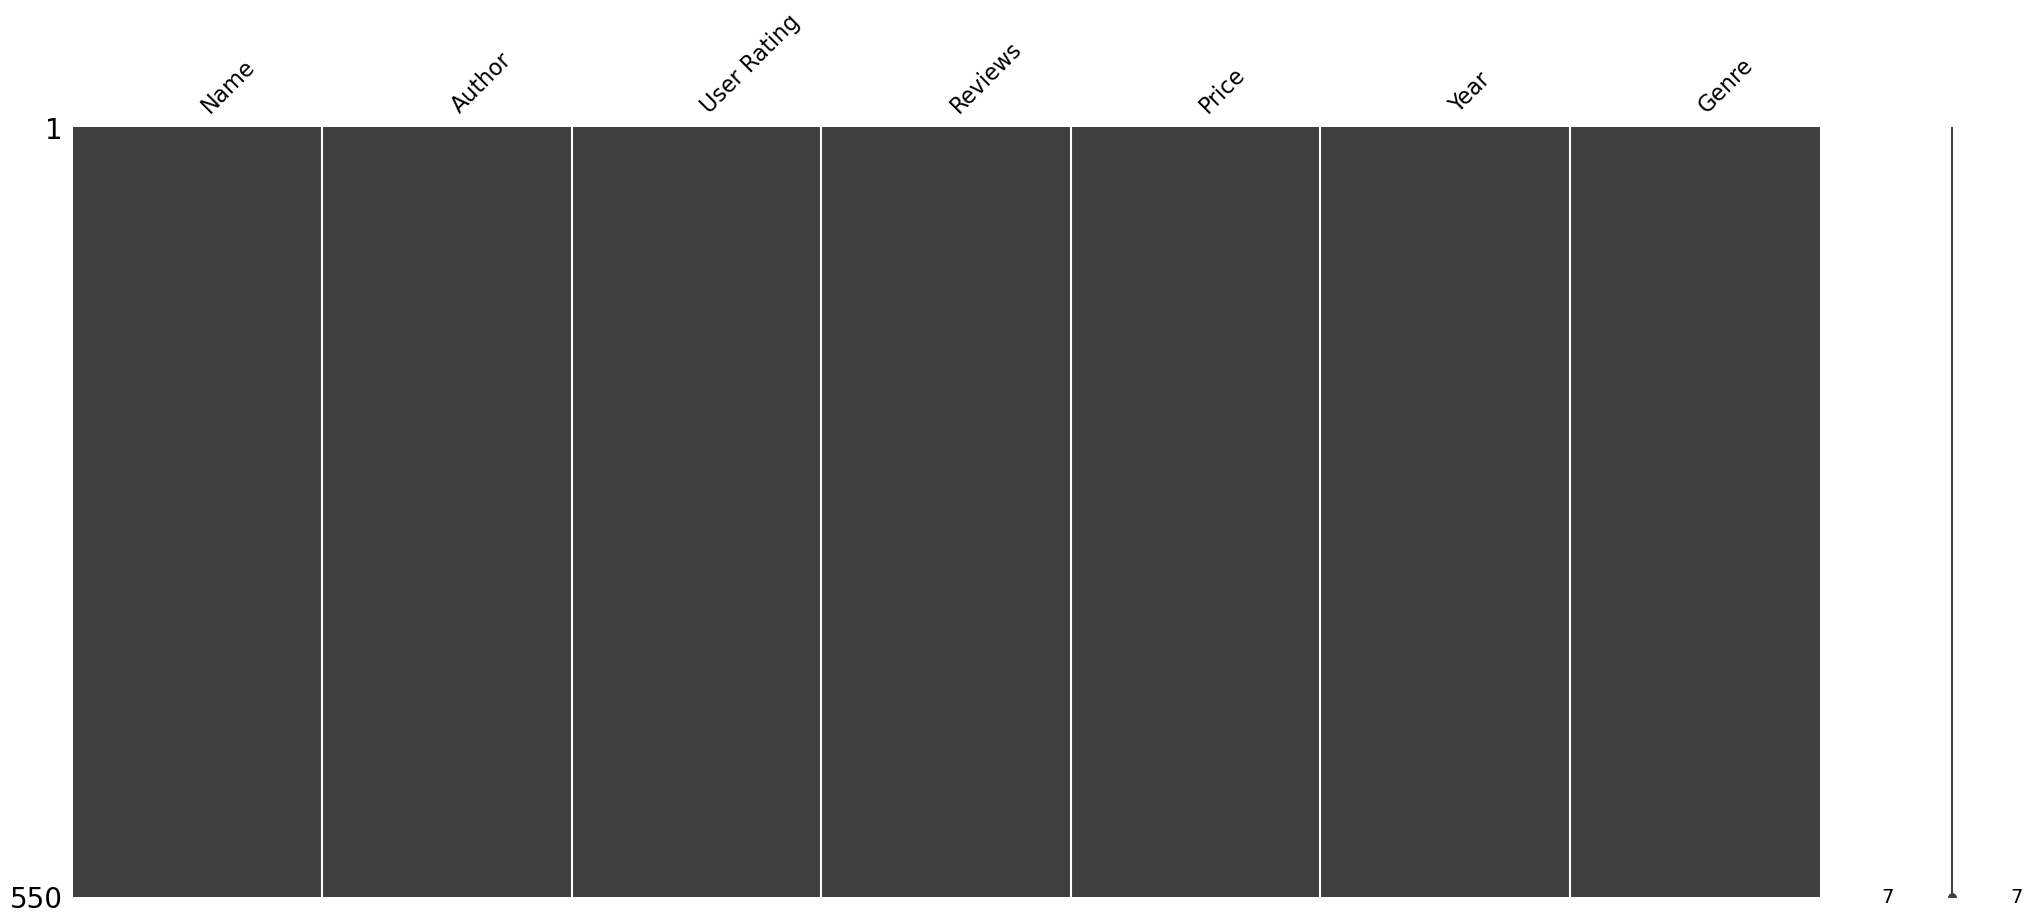

In [47]:
mn.matrix(dataFrame)

How popular is the book?

User ratings:-

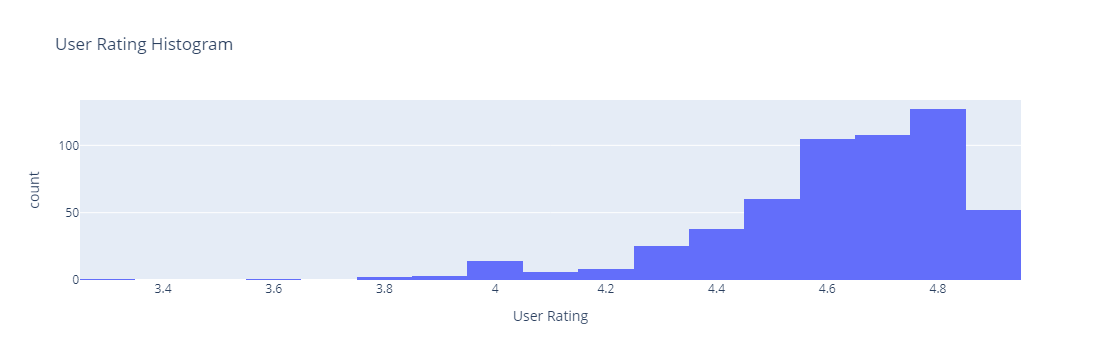

In [49]:
fig = px.histogram(dataFrame, x="User Rating",labels={'':'The Number of Books'},title="User Rating Histogram")
fig.show()

Based on this information, we would like to divide the "Popularity" of books into four stages.
Popularity Level	Rating
s
Extremely Popular	　4.8 or 4.9
Very Popular	4.5 ~ 4.7
Fairly Popular	4.0 ~ 4.4
Popular	3.3 ~ 3.9

According to the graph above, there is a little variation in User Rating.
About 180 books have a rating of 4.8 or 4.9.
In the meantime, the rating of 9 books is less than 4.0.
Based on this information, we would like to divide the "Popularity" of books into four stages.

Extremely Popular   4.8 or 4.9
Very Popular        4.5 ~ 4.7
Fairly Popular	    4.0 ~ 4.4
Popular	            3.3 ~ 3.9

In [57]:
popularity = [0,0,0,0]
for i in dataFrame["User Rating"]:
    if i >= 4.8:
        popularity[0] += 1
    elif i >= 4.5:
        popularity[1] += 1
    elif i >= 4.0:
        popularity[2] += 1
    else:
        popularity[3] += 1

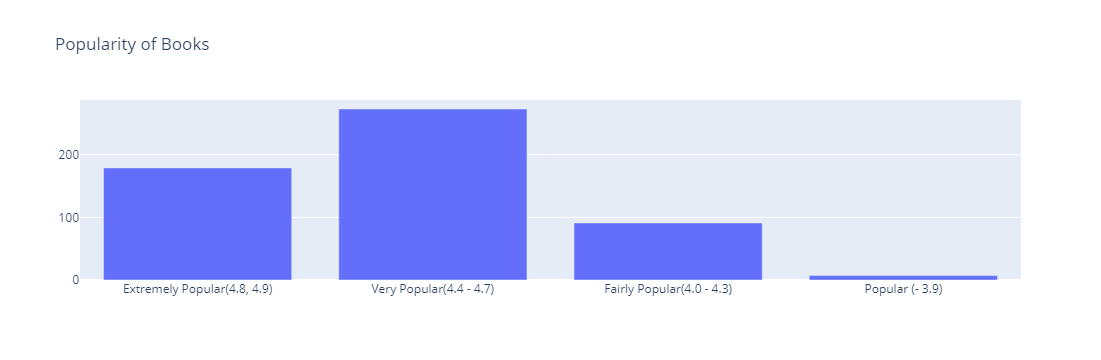

In [59]:
x = ['Extremely Popular(4.8, 4.9)','Very Popular(4.4 - 4.7)','Fairly Popular(4.0 - 4.3)','Popular (- 3.9)']
fig = go.Figure([go.Bar(x=x, y=popularity)])
fig.update_layout(title_text='Popularity of Books')
fig.show()

Bestselling Books Rated 4.9


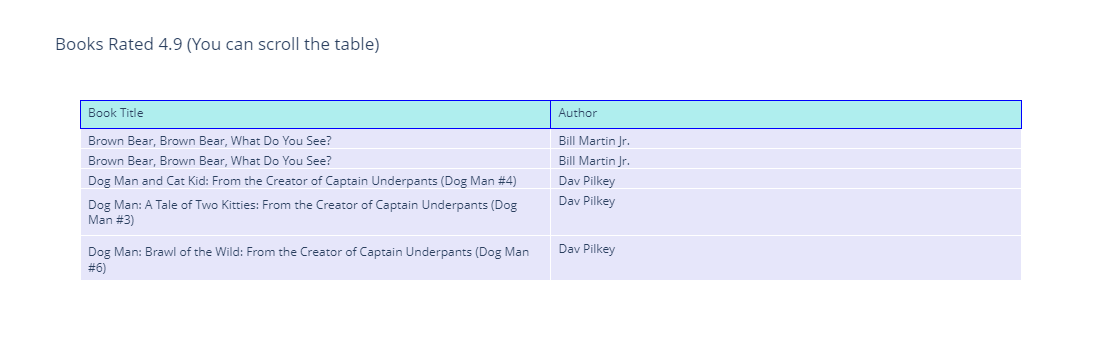

In [67]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['Book Title','Author'],
                fill_color='paleturquoise',
                line_color='blue',
                align='left'),
    cells=dict(values=[dataFrame[dataFrame["User Rating"] == 4.9]["Name"],dataFrame[dataFrame["User Rating"] == 4.9]["Author"]],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(title='Books Rated 4.9 (You can scroll the table)')
fig.show()


The column "Name" shows the name of the bestselling book.
The name of books is very important, because readers get a first impression from it

the book which has short title is not always popular, and vice versa.
However, the short title has the advantage of being simple and easy to understand, and the long title has that of giving readers an accurate understanding of what the book is like.
Then, we try to find out the relationships between the length of name and ratin.

ng

In [69]:
name_len = []
for i in dataFrame["Name"]:
    name_len.append(len(i))

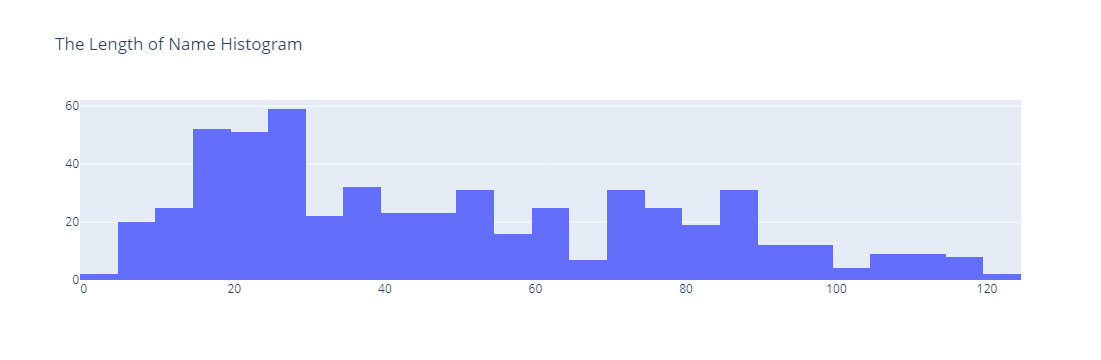

In [71]:
fig = go.Figure(data=[go.Histogram(x=name_len)])
fig.update_layout(title_text='The Length of Name Histogram')
fig.show()

there is a big variation in the length of book name.
There are many books which has the short title, but some books have very long title.

Relationship between Popularity and Length of Name

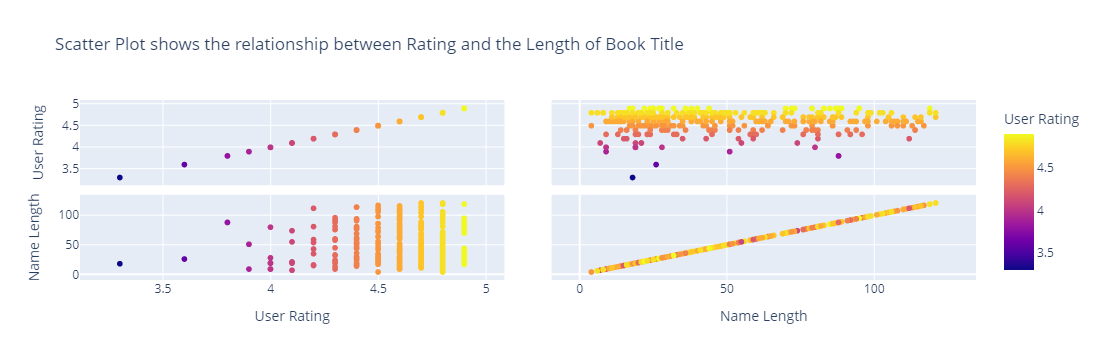

In [73]:
dataFrame["Name Length"] = name_len
fig = px.scatter_matrix(dataFrame, dimensions=["User Rating","Name Length"], color="User Rating",title="Scatter Plot shows the relationship between Rating and the Length of Book Title")
fig.show()

It seems that there is no correlation between the popularity and the length of name.
ks.

Author: Who Wrote the Bestselling Book

The column "Author" shows the name of the author who wrote the bestselling book.
There are very few authors who can write bestselling books.

In [77]:
print("We have " + str(len(dataFrame["Author"].unique())) + " best-selling authors.")

We have 248 best-selling authors.


In [81]:
authors = dataFrame["Author"].value_counts()
author_times = []
author_names = []
for i in range(len(authors)):
    author_names.append(authors.keys()[i])
    author_times.append(authors[i])

The author who wrote  the most a lot of bestselling books

In [83]:
popular_authors = pd.DataFrame({"Author":author_names,"Number of Times":author_times})
popular_authors

,Author,Number of Times
0,Jeff Kinney,12
1,Gary Chapman,11
2,Rick Riordan,11
3,Suzanne Collins,11
4,American Psychological Association,10
...,...,...
243,Keith Richards,1
244,Chris Cleave,1
245,Alice Schertle,1
246,Celeste Ng,1


The column "Number of Times" means that the number of times the author's work is in Top 50

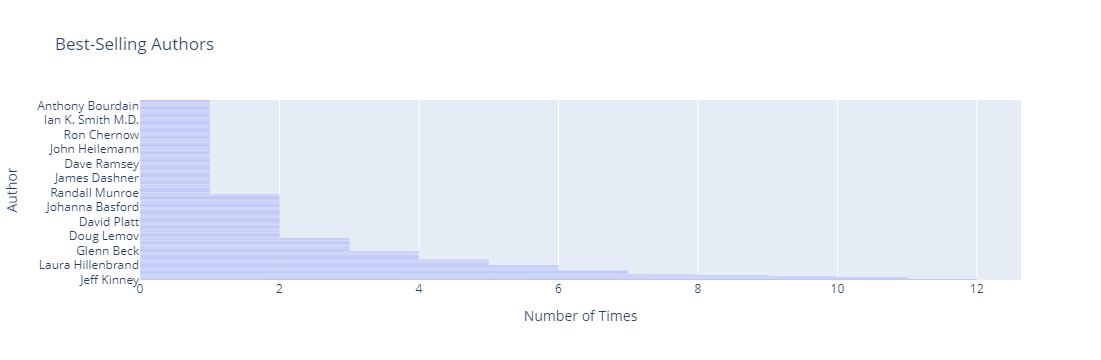

In [85]:
fig = px.bar(popular_authors, y='Author', x='Number of Times',title="Best-Selling Authors")
fig.show()

The bar graph above shows that some of the bestselling authors have received high praise over several years, and some have written several bestselling books.

The Number of Reviews 📝 by Readers

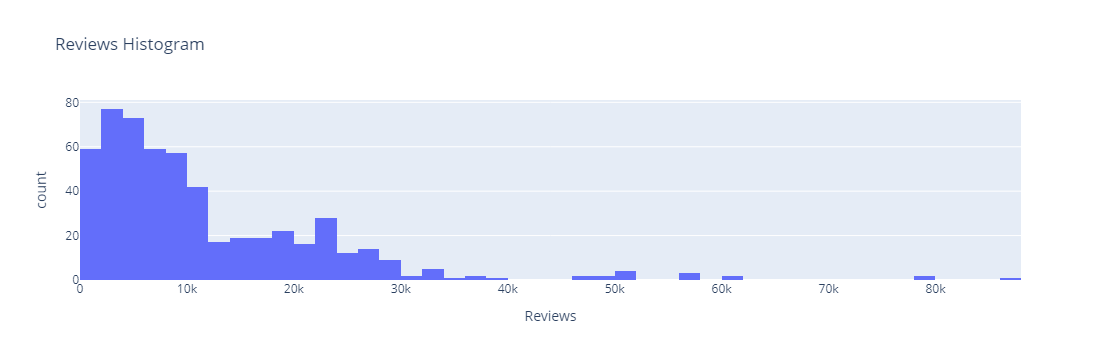

In [87]:
fig = px.histogram(dataFrame, x="Reviews",labels={'':'The Number of Books'},title="Reviews Histogram")
fig.show()

The Bestselling Book which has the most reviews


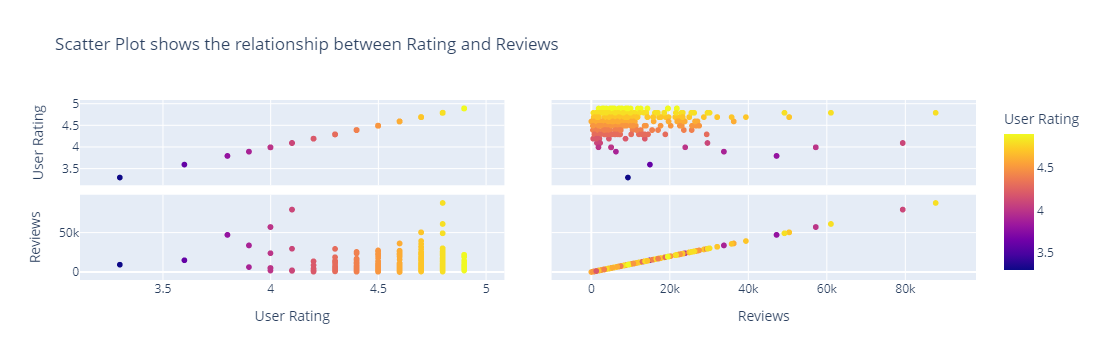

In [91]:
fig = px.scatter_matrix(dataFrame, dimensions=["User Rating","Reviews"], color="User Rating",title="Scatter Plot shows the relationship between Rating and Reviews")
fig.show()

According to the graph above, we can see that there is no correlation between User Rating and the number of reviews.
However, the graph also shows that books which have relatively low rateing do not have many reviews.

How much is the book?

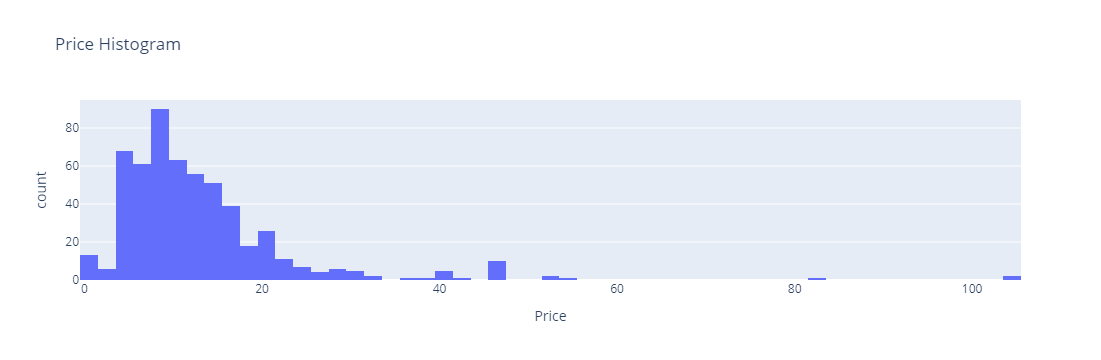

In [93]:
fig = px.histogram(dataFrame, x="Price",labels={'':'The Number of Books'},title="Price Histogram")
fig.show()

Most of bestselling books are priced at less than 20 dollars.
Except for specialized books, most of books can be bought for less than 20 dollars, so there is no surprise

The most Expensive Bestselling Book is

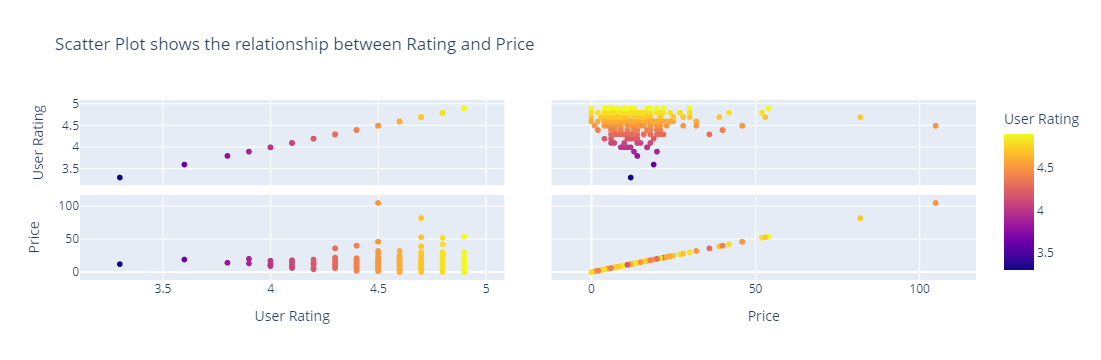

In [95]:
fig = px.scatter_matrix(dataFrame, dimensions=["User Rating","Price"], color="User Rating",title="Scatter Plot shows the relationship between Rating and Price")
fig.show()

We can see that there is no correlation between Rating and Price.
However, books with particularly high prices (more than 50 dollars) are generally high evaluated.

Is the Book Fiction or Non-fiction

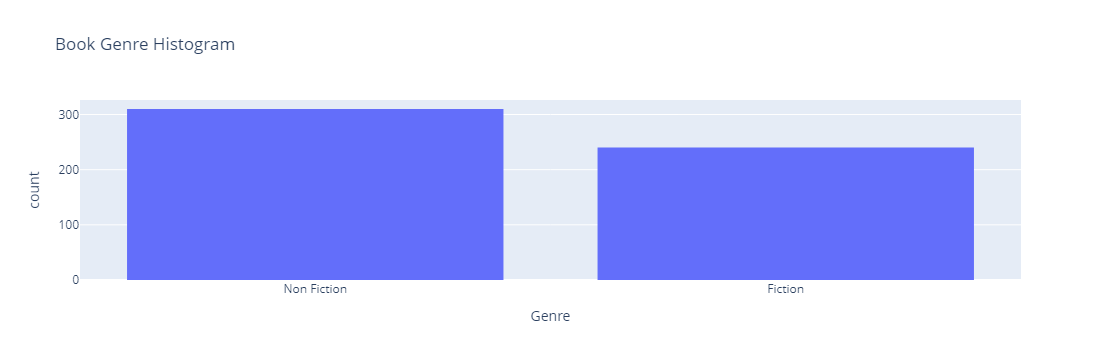

In [97]:
fig = px.histogram(dataFrame, x="Genre",labels={'':'The Number of Books'},title="Book Genre Histogram")
fig.show()

We can see that there are more non-fiction books than fiction.

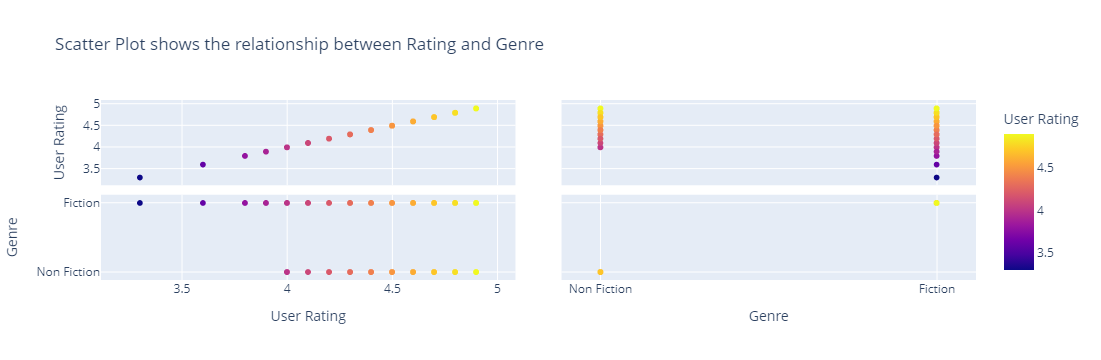

In [99]:
fig = px.scatter_matrix(dataFrame, dimensions=["User Rating","Genre"], color="User Rating",title="Scatter Plot shows the relationship between Rating and Genre")
fig.show()

We can see that all non-fiction books have a 4.0 or higher rating, while some of fiction books have a relatively low rating.

 we observed the data about top 50 bestselling books on Amazon.
 
No clear correlation between user rating and other features was observed, but we could find some weak correlations